In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [2]:
forest_data=pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
forest_data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

<AxesSubplot:>

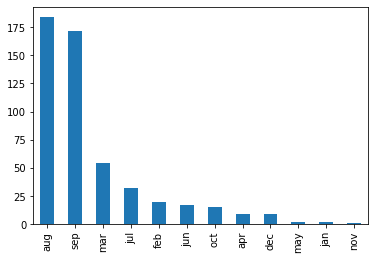

In [8]:
forest_data['month'].value_counts().plot.bar()

<AxesSubplot:>

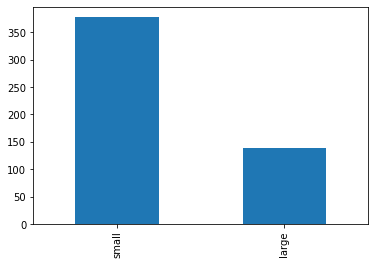

In [9]:
forest_data['size_category'].value_counts().plot.bar()

# Inference:
In the months of august and september the forest might be burned a lot when compared to another months

# Converting the data into numeric

In [10]:
le=LabelEncoder()
forest_data['month']=le.fit_transform(forest_data['month'])
forest_data['size_category']=le.fit_transform(forest_data['size_category'])

# To visualize in which month the forest fire has occupaied the large area and small area

<AxesSubplot:xlabel='month', ylabel='size_category'>

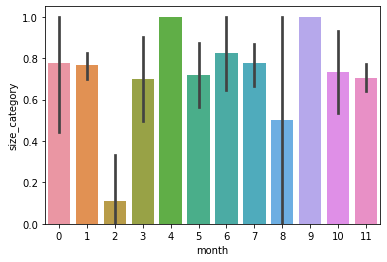

In [11]:
sns.barplot(x='month',y='size_category',data=forest_data)

In [12]:
x=forest_data.drop(labels=['month','day','size_category'],axis=1)
x


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y= forest_data['size_category']
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

# Splitting the data into train and test parts

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [16]:
x_train.shape,y_train.shape

((413, 28), (413,))

In [17]:
x_test.shape,y_test.shape

((104, 28), (104,))

# Building SVM Model
Terminology:

SVM -Support Vector Machine
SVC- Support Vector Classifier

In [18]:
svc=SVC()
svc.fit(x_train,y_train)

#Making Predictions
y_pred_test=svc.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.10      0.18        30
           1       0.73      1.00      0.85        74

    accuracy                           0.74       104
   macro avg       0.87      0.55      0.51       104
weighted avg       0.81      0.74      0.65       104

confusion matrix: [[ 3 27]
 [ 0 74]]
Accuarcy score: 0.7403846153846154
Precision Score: 0.7326732673267327
Recall Score: 1.0


# Tweaking different Kernels
1.Linear

# 

In [20]:
#Using Grid search to find best estimator with best accuracy
param_grid=[{'kernel':['linear'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(svc,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2],
                          'kernel': ['linear']}])

In [21]:

gsv.best_params_ , gsv.best_score_

({'C': 0.01, 'gamma': 50, 'kernel': 'linear'}, 0.9879210220673634)

In [22]:
svc=SVC(C=0.01,kernel='linear', gamma=50)
svc.fit(x_train,y_train)

#Making Predictions
y_pred_test=svc.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.99      0.97      0.98        74

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

confusion matrix: [[29  1]
 [ 2 72]]
Accuarcy score: 0.9711538461538461
Precision Score: 0.9863013698630136
Recall Score: 0.972972972972973


# 2.RBF(Radial Bias Function)

In [23]:
#Using Grid search to find best estimator with best accuracy
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv1=GridSearchCV(svc,param_grid,cv=10)
gsv1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(C=0.01, gamma=50, kernel='linear'),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['rbf']}])

In [24]:
gsv1.best_params_ , gsv1.best_score_

({'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7409407665505225)

In [25]:
svc=SVC(C=1000,kernel='rbf', gamma=0.5)
svc.fit(x_train,y_train)

#Making Predictions
y_pred_test=svc.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.72      1.00      0.84        74

    accuracy                           0.72       104
   macro avg       0.86      0.52      0.45       104
weighted avg       0.80      0.72      0.61       104

confusion matrix: [[ 1 29]
 [ 0 74]]
Accuarcy score: 0.7211538461538461
Precision Score: 0.7184466019417476
Recall Score: 1.0


# 3.Poly

In [26]:
#Using Grid search to find best estimator with best accuracy
param_grid=[{'kernel':['poly'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv2=GridSearchCV(svc,param_grid,cv=10)
gsv2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(C=1000, gamma=0.5),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['poly']}])

In [27]:
gsv1.best_params_ , gsv1.best_score_

({'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7409407665505225)

In [28]:
svc=SVC(C=1000,kernel='poly', gamma=0.5)
svc.fit(x_train,y_train)

#Making Predictions
y_pred_test=svc.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.96      0.97      0.97        74

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.95      0.95      0.95       104

confusion matrix: [[27  3]
 [ 2 72]]
Accuarcy score: 0.9519230769230769
Precision Score: 0.96
Recall Score: 0.972972972972973


# Conclusion:
The linear model in SVM gives the best

Accuarcy score: 0.971
Precision Score: 0.986
Recall Score: 0.972 with 'C': 0.01, 'gamma': 50,